In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from collections import Counter
import matplotlib.gridspec as gridspec


df = pd.read_csv("new_diabetes.csv")
# criando sample da classe não diabéticos
no = df[df['diabetes'] == 0.0].sample(5000)
# criando sample da classe diabéticos
yes = df[df['diabetes'] == 1.0]
# criando dataset para usar no som
dft = pd.concat([no, yes])
# transforma para numpy
data = dft.to_numpy()
#remove última coluna
data = data[:, 1:]
#atribui coluna diabetes a target
target = data[:, -1]
#labels
label_names = {0:'Nao diabéticos', 1:'Diabéticos'}
# 
data = data[:, :-1]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
# Initialization and training
n_neurons = 10
m_neurons = 10
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random training

labels_map = som.labels_map(data, target)

# Classificação dos pacientes
predicted_labels = []
for sample in data:
    winner = som.winner(sample)
    predicted_label = int(dict(labels_map)[winner].most_common(1)[0][0]) # Pega a maior contagem de labels prescritos
    predicted_labels.append(predicted_label)


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 1.3744284932958648


In [24]:
(labels_map)[winner]

Counter({0.0: 51, 1.0: 228})

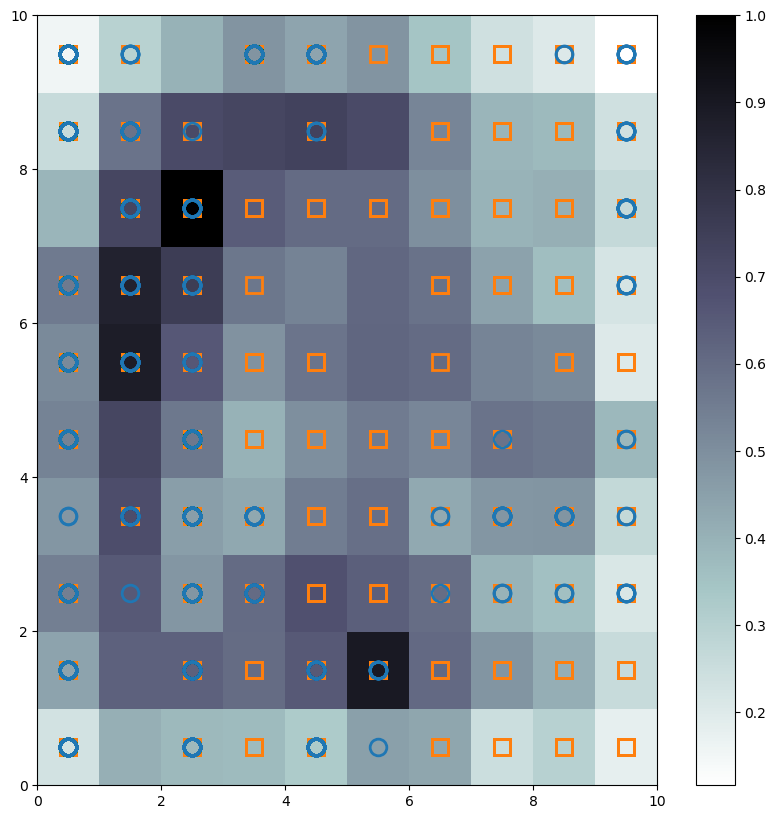

In [25]:
plt.figure(figsize=(10, 10))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[int(target[int(cnt)]-1)], markerfacecolor='None',
             markeredgecolor=colors[int(target[int(cnt)]-1)], markersize=12, markeredgewidth=2)
plt.savefig('primeiro.png')
plt.show()

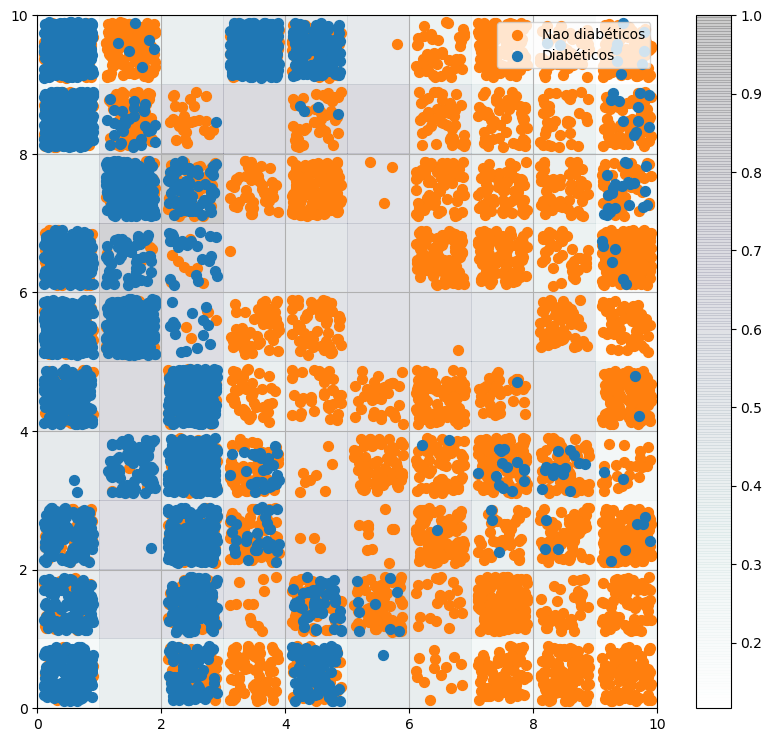

In [26]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[int(c)-1], label=label_names[int(c)])
plt.legend(loc='upper right')
plt.grid()
plt.savefig('segundo.png')
plt.show()

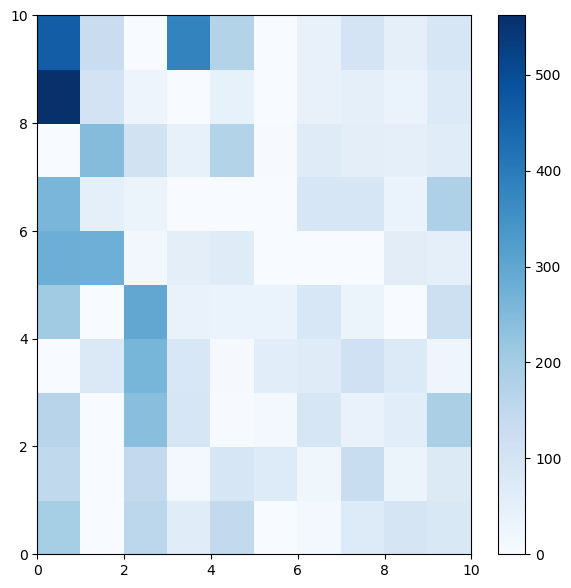

In [27]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.savefig('terceiro.png')
plt.show()

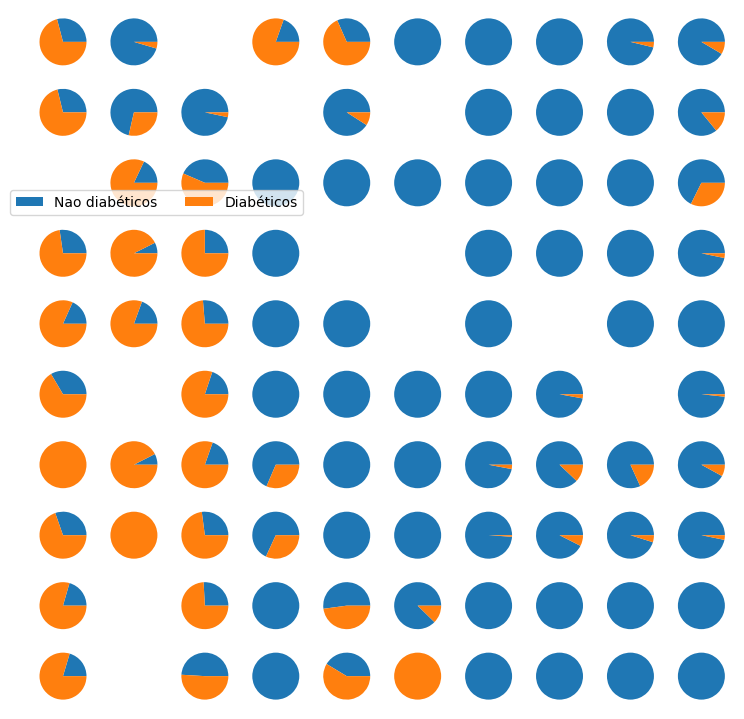

In [28]:
labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.savefig('quarto.png')
plt.show()

In [29]:
w

(0, 5)

In [30]:
Counter(predicted_labels)

Counter({1: 4916, 0: 3988})

In [31]:
labels_map

defaultdict(list,
            {(0, 8): Counter({'Nao diabéticos': 162, 'Diabéticos': 400}),
             (4, 7): Counter({'Nao diabéticos': 175}),
             (2, 4): Counter({'Nao diabéticos': 59, 'Diabéticos': 238}),
             (9, 6): Counter({'Nao diabéticos': 178, 'Diabéticos': 6}),
             (4, 0): Counter({'Nao diabéticos': 60, 'Diabéticos': 85}),
             (8, 7): Counter({'Nao diabéticos': 54}),
             (8, 0): Counter({'Nao diabéticos': 95}),
             (5, 1): Counter({'Nao diabéticos': 64, 'Diabéticos': 9}),
             (9, 2): Counter({'Nao diabéticos': 181, 'Diabéticos': 6}),
             (8, 8): Counter({'Nao diabéticos': 36}),
             (7, 9): Counter({'Nao diabéticos': 99}),
             (4, 5): Counter({'Nao diabéticos': 67}),
             (2, 0): Counter({'Nao diabéticos': 78, 'Diabéticos': 81}),
             (2, 2): Counter({'Nao diabéticos': 65, 'Diabéticos': 175}),
             (9, 4): Counter({'Nao diabéticos': 117, 'Diabéticos': 2}),
      

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(list(target), predicted_labels, target_names=['não diabéticos','diabéticos']))

                precision    recall  f1-score   support

não diabéticos       0.94      0.75      0.83      5000
    diabéticos       0.74      0.94      0.83      3904

      accuracy                           0.83      8904
     macro avg       0.84      0.84      0.83      8904
  weighted avg       0.85      0.83      0.83      8904



In [38]:
tn, fp, fn, tp = confusion_matrix(list(target), predicted_labels).ravel()
print(confusion_matrix(list(target), predicted_labels))

[[3740 1260]
 [ 248 3656]]


In [39]:
(tn, fp, fn, tp)

(3740, 1260, 248, 3656)